# Genesis 5

- From Adam to Noah (1-32)
- Adam fathered sons and daughters (4)
- Enoch walked with God (21-24)

Creating a timeline is not that easy. The datetime from pandas is limited:

In [1]:
import pandas as pd

print("Minimum time is:", pd.Timestamp.min)
print("Maximum time is:", pd.Timestamp.max)
y = 2262-1677
d = y * 365.25
s = d *24 * 60 * 60
print(y, d, s)
print(2**64)

Minimum time is: 1677-09-21 00:12:43.145224193
Maximum time is: 2262-04-11 23:47:16.854775807
585 213671.25 18461196000.0
18446744073709551616


Obviously Timestamp only supports dates from 1677 to 2262. The reason is to use a 64bit representation of time and be able to have nanosecond precision. 

A build in time format in python is datetime. It has a much larger range than 585 years, but is not much better, since it does not support BCE dates. Guido van Rossum commented on this in 2018 with reference to the nonexsisting year zero and other problems.

In [2]:
import datetime
print(datetime.datetime.min)
print(datetime.datetime.max)

0001-01-01 00:00:00
9999-12-31 23:59:59.999999


A solution is [astropy.time](https://docs.astropy.org/en/stable/time/index.html) For a start we just use integers for the years.

Adam was born in 4026 BCE and died 3096 BCE and he lived 930 years.
Seth was born in 3896 BCE and died 2984 BCE and he lived 912 years.
Eʹnosh was born in 3791 BCE and died 2886 BCE and he lived 905 years.
Keʹnan was born in 3701 BCE and died 2791 BCE and he lived 910 years.
Ma·halʹa·lel was born in 3631 BCE and died 2736 BCE and he lived 895 years.
Jaʹred was born in 3566 BCE and died 2604 BCE and he lived 962 years.
Eʹnoch was born in 3404 BCE and died 3039 BCE and he lived 365 years.
Me·thuʹse·lah was born in 3339 BCE and died 2370 BCE and he lived 969 years.
Laʹmech was born in 3152 BCE and died 2377 BCE and he lived 775 years.
Noah was born in 2970 BCE and died 2020 BCE and he lived 950 years.
Shem was born in 2468 BCE and died 1868 BCE and he lived 600 years.


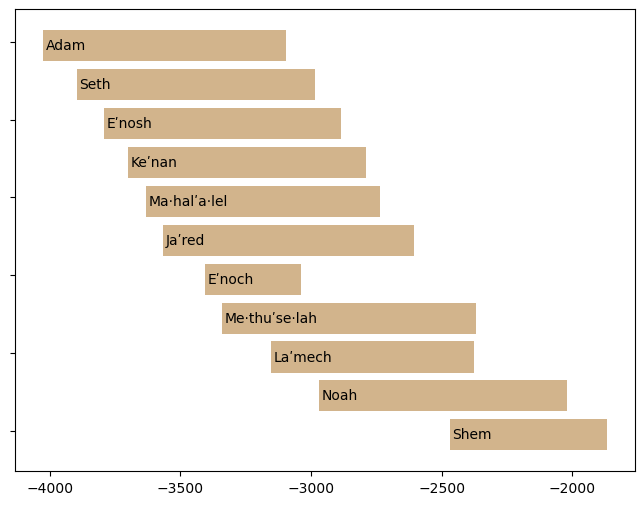

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

generation = pd.read_csv("https://raw.githubusercontent.com/kreier/study/main/markdown/01_Ge/05.csv")
# print(generation)

for index, row in generation.iterrows():
    print(f"{row.person} was born in {-row.born} BCE and died {-row.died} BCE and he lived {row.died - row.born} years.")

fig, gnt = plt.subplots(figsize=(8,6))

# y_tick_labels = generation['person']
# y_pos = np.arange(len(y_tick_labels))
# gnt.set_yticks(y_pos)
# gnt.set_yticklabels(y_tick_labels)
gnt.set_yticklabels("")

generation['BCE'] = -generation['born']

for index, row in generation.sort_values(by='BCE').reset_index().iterrows():
    lifespan = -(row.born - row.died)
    gnt.broken_barh([(row.born, lifespan)], 
                    (index - 0.5, 0.8), 
                    facecolors =('tan'),
                   label=row.name)
    gnt.text(row.born + 10, index-0.2, row.person)

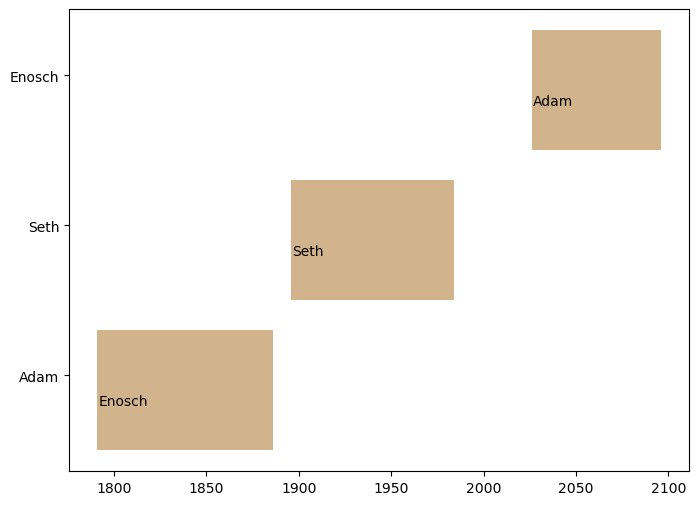

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# source = pd.DataFrame([
#     {"person": "Adam",   "start": '-4026-01-01', "end": '-3096-01-01'},
#     {"person": "Seth",   "start": '-3896-01-01', "end": '-2984-01-01'},
#     {"person": "Enosch", "start": '-3791-01-01', "end": '-2886-01-01'}
# ])

source = pd.DataFrame([
    {"person": "Adam",   "start": '2026-01-01', "end": '2096-01-01'},
    {"person": "Seth",   "start": '1896-01-01', "end": '1984-01-01'},
    {"person": "Enosch", "start": '1791-01-01', "end": '1886-01-01'}
])

source['start'] = pd.to_datetime(source['start'])
source['end'] = pd.to_datetime(source['end'])
source['diff'] = source['end'] - source['start']
 
# Declaring a figure "gnt"
fig, gnt = plt.subplots(figsize=(8,6))
 
# Need to fix hidden tick labels
# https://stackoverflow.com/questions/43673659/matplotlib-not-showing-first-label-on-x-axis-for-the-bar-plot
 
y_tick_labels = source.person.values
y_pos = np.arange(len(y_tick_labels))
 
gnt.set_yticks(y_pos)
gnt.set_yticklabels(y_tick_labels)

# https://sparkbyexamples.com/python/iterate-over-rows-in-pandas-dataframe/
# https://www.tutorialspoint.com/plotting-dates-on-the-x-axis-with-python-s-matplotlib
# https://matplotlib.org/stable/gallery/color/named_colors.html
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
# https://www.geeksforgeeks.org/how-to-annotate-matplotlib-scatter-plots
for index, row in source.sort_values(by='start').reset_index().iterrows():
    start_year = int(row.start.strftime("%Y"))
    duration = row['diff'].days/365
    gnt.broken_barh([(start_year, duration)], 
                    (index-0.5,0.8), 
                    facecolors =('tan'),
                   label=row.person)
    gnt.text(start_year+0.5, index-0.2, row.person)

## Hint for VS Code and Jupyter

The source for the kernel is C:\Users\matth\anaconda3\python.exe